In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('nepal_stock_market.csv')
df

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status,Company
0,2022-01-02,410.0,412.0,400.1,411.00,0.24,78818.0,32071339.8,1,ADBL
1,2022-01-03,416.0,418.0,412.0,415.00,0.97,35929.0,14924061.5,1,ADBL
2,2022-01-04,422.0,424.0,410.0,422.00,1.69,52990.0,22249267.5,1,ADBL
3,2022-01-05,426.0,430.0,418.0,419.00,-0.71,45591.0,19202068.3,-1,ADBL
4,2022-01-06,420.0,422.0,415.5,421.00,0.48,37485.0,15665637.0,1,ADBL
...,...,...,...,...,...,...,...,...,...,...
83266,2025-04-20,200.3,208.0,200.0,200.58,-1.83,147677.0,29700844.0,1,UPPER
83267,2025-04-21,204.5,204.5,199.8,200.75,0.08,166506.0,33610335.5,-1,UPPER
83268,2025-04-22,200.2,202.4,199.0,199.73,-0.51,144020.0,28809857.6,-1,UPPER
83269,2025-04-23,201.7,201.7,197.0,197.51,-1.11,140211.0,27766853.3,-1,UPPER


In [45]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['weekday'] = df['published_date'].dt.day_name()
df['month'] = df['published_date'].dt.month
df['week'] = df['published_date'].dt.isocalendar().week
df = df.sort_values('published_date')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83271 entries, 0 to 83270
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   published_date   83271 non-null  datetime64[ns]
 1   open             82421 non-null  float64       
 2   high             83271 non-null  float64       
 3   low              83271 non-null  float64       
 4   close            83271 non-null  float64       
 5   per_change       81271 non-null  float64       
 6   traded_quantity  83271 non-null  float64       
 7   traded_amount    81711 non-null  float64       
 8   status           83271 non-null  int64         
 9   Company          83271 non-null  object        
 10  weekday          83271 non-null  object        
 11  month            83271 non-null  int32         
 12  week             83271 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(7), int32(1), int64(1), object(2)
memory usage: 8.3+ MB

In [47]:
df.isna().sum()

published_date        0
open                850
high                  0
low                   0
close                 0
per_change         2000
traded_quantity       0
traded_amount      1560
status                0
Company               0
weekday               0
month                 0
week                  0
dtype: int64

In [48]:
df = df.sort_values(['Company', 'published_date'])
df['open'] = df['open'].fillna(df.groupby('Company')['close'].shift(1))
df.isna().sum()

published_date        0
open                  1
high                  0
low                   0
close                 0
per_change         2000
traded_quantity       0
traded_amount      1560
status                0
Company               0
weekday               0
month                 0
week                  0
dtype: int64

In [49]:
df['per_change'] = df['per_change'].fillna(((df['high'] - df['low']) / df['high']) * 100)
df.isna().sum()

published_date        0
open                  1
high                  0
low                   0
close                 0
per_change            0
traded_quantity       0
traded_amount      1560
status                0
Company               0
weekday               0
month                 0
week                  0
dtype: int64

In [50]:
df['traded_amount'] = df['traded_amount'].fillna(df['traded_quantity'] * df['close'])
df.isna().sum()

published_date     0
open               1
high               0
low                0
close              0
per_change         0
traded_quantity    0
traded_amount      0
status             0
Company            0
weekday            0
month              0
week               0
dtype: int64

In [51]:
df[df['Company'] == 'SANIMA']

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status,Company,weekday,month,week
64605,2022-01-02,NaN,365.0,354.0,363.00,2.540000,53951.0,19459574.5,1,SANIMA,Sunday,1,52
64606,2022-01-03,367.9,377.0,366.0,372.00,2.480000,55415.0,20542391.9,1,SANIMA,Monday,1,1
64607,2022-01-04,368.0,384.0,365.0,381.90,4.947917,62937.0,23707800.2,1,SANIMA,Tuesday,1,1
64608,2022-01-05,384.0,392.5,373.0,376.00,-1.540000,80827.0,30871358.4,-1,SANIMA,Wednesday,1,1
64609,2022-01-06,377.0,381.9,375.0,378.00,0.530000,61095.0,23092370.8,1,SANIMA,Thursday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65376,2025-04-20,310.0,313.0,307.0,309.54,1.080000,113708.0,35233967.3,-1,SANIMA,Sunday,4,16
65377,2025-04-21,315.7,315.7,305.0,311.91,0.770000,79029.0,24501253.5,-1,SANIMA,Monday,4,17
65378,2025-04-22,310.0,313.0,307.5,312.19,0.090000,106834.0,33168731.5,1,SANIMA,Tuesday,4,17
65379,2025-04-23,310.0,312.4,308.1,309.29,-0.930000,62979.0,19496040.5,-1,SANIMA,Wednesday,4,17


In [52]:
df['open'] = df['open'].fillna(360)
df.isna().sum()

published_date     0
open               0
high               0
low                0
close              0
per_change         0
traded_quantity    0
traded_amount      0
status             0
Company            0
weekday            0
month              0
week               0
dtype: int64

In [53]:
df[df['Company'] == 'SANIMA']

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status,Company,weekday,month,week
64605,2022-01-02,360.0,365.0,354.0,363.00,2.540000,53951.0,19459574.5,1,SANIMA,Sunday,1,52
64606,2022-01-03,367.9,377.0,366.0,372.00,2.480000,55415.0,20542391.9,1,SANIMA,Monday,1,1
64607,2022-01-04,368.0,384.0,365.0,381.90,4.947917,62937.0,23707800.2,1,SANIMA,Tuesday,1,1
64608,2022-01-05,384.0,392.5,373.0,376.00,-1.540000,80827.0,30871358.4,-1,SANIMA,Wednesday,1,1
64609,2022-01-06,377.0,381.9,375.0,378.00,0.530000,61095.0,23092370.8,1,SANIMA,Thursday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65376,2025-04-20,310.0,313.0,307.0,309.54,1.080000,113708.0,35233967.3,-1,SANIMA,Sunday,4,16
65377,2025-04-21,315.7,315.7,305.0,311.91,0.770000,79029.0,24501253.5,-1,SANIMA,Monday,4,17
65378,2025-04-22,310.0,313.0,307.5,312.19,0.090000,106834.0,33168731.5,1,SANIMA,Tuesday,4,17
65379,2025-04-23,310.0,312.4,308.1,309.29,-0.930000,62979.0,19496040.5,-1,SANIMA,Wednesday,4,17


In [54]:
df['Company'].unique()

array(['ADBL', 'AHPC', 'AKJCL', 'AKPL', 'ALICL', 'API', 'BARUN', 'BFC',
       'BOKL', 'BPCL', 'CBL', 'CCBL', 'CFCL', 'CGH', 'CHCL', 'CHDC',
       'CHL', 'CIT', 'CORBL', 'CZBIL', 'DHPL', 'EBL', 'EDBL', 'GBBL',
       'GBIME', 'GFCL', 'GHL', 'GLH', 'GLICL', 'GMFIL', 'GRDBL', 'GUFL',
       'HBL', 'HDHPC', 'HIDCL', 'HPPL', 'HURJA', 'ICFC', 'JBBL', 'JFL',
       'JLI', 'JOSHI', 'KBL', 'KKHC', 'KPCL', 'KRBL', 'KSBBL', 'LBBL',
       'LBL', 'LEC', 'LICN', 'MBL', 'MDB', 'MEGA', 'MEN', 'MFIL', 'MHNL',
       'MKJC', 'MLBL', 'MNBBL', 'MPFL', 'NABBC', 'NABIL', 'NBB', 'NBL',
       'NCCB', 'NFS', 'NGPL', 'NHDL', 'NHPC', 'NIB', 'NICA', 'NIFRA',
       'NLIC', 'NLICL', 'NMB', 'NRN', 'NYADI', 'OHL', 'PCBL', 'PFL',
       'PLI', 'PLIC', 'PMHPL', 'PPCL', 'PROFL', 'PRVU', 'RADHI', 'RHPL',
       'RLFL', 'RLI', 'RURU', 'SADBL', 'SAHAS', 'SANIMA', 'SAPDBL', 'SBI',
       'SBL', 'SCB', 'SFCL', 'SHEL', 'SHINE', 'SHL', 'SHPC', 'SIFC',
       'SINDU', 'SJCL', 'SLI', 'SLICL', 'SPC', 'SPDL', 'SRBL', 'SSHL',


In [ ]:
commercial_banks = [
    'ADBL', 'BOKL', 'EBL', 'HBL', 'KBL', 'MEGA', 'MBL', 'NABIL', 'NBB',
    'NBL', 'NIB', 'NMB', 'PCBL', 'PRVU', 'SANIMA', 'SCB', 'SBL', 'SBI',
    'SRBL', 'NICA', 'GBIME', 'CCBL'
]

development_banks = [
    'LBBL', 'MLBL', 'MNBBL', 'NCCB', 'SINDU', 'SHINE', 'KSBBL', 'GBBL', 'CZBIL', 'CBL', 'GRDBL'
]

finance_companies = [
    'BFC', 'CFCL', 'GMFIL', 'GUFL', 'ICFC', 'JFL', 'MPFL', 'PFL',
    'PROFL', 'RLFL', 'SFCL', 'SIFC', 'MDB', 'NFS', 'GFCL'
]

microfinance = [
    'AKJCL', 'KRBL', 'LEC', 'MKJC', 'NABBC', 'SAPDBL', 'SSHL', 'UMRH'
]

hydropower = [
    'AHPC', 'AKPL', 'API', 'BARUN', 'BPCL', 'CHCL', 'CHDC', 'CHL', 'DHPL', 'EDBL',
    'GHL', 'HIDCL', 'HPPL', 'HURJA', 'JOSHI', 'KKHC', 'MEN', 'MHNL', 'NHDL', 'NHPC',
    'NGPL', 'NYADI', 'PMHPL', 'PPCL', 'RADHI', 'RHPL', 'RURU', 'SAHAS', 'SHEL', 'SHL',
    'SHPC', 'SJCL', 'SPC', 'SPDL', 'TPC', 'ULI', 'UMHL', 'UNHPL', 'UPCL', 'UPPER', 'GLH'
]

life_insurance = [
    'ALICL', 'GLICL', 'JLI', 'LICN', 'NLIC', 'NLICL', 'PLIC', 'RLI', 'SLICL', 'SLI'
]

non_life_insurance = [
    'PLI'
]

investment = [
    'CIT', 'CORBL'
]

hotels_and_tourism = [
    'TRH', 'OHL', 'CGH'
]

nepse_sectors = {
    'Commercial Banks': commercial_banks,
    'Development Banks': development_banks,
    'Finance Companies': finance_companies,
    'Microfinance': microfinance,
    'Hydropower': hydropower,
    'Life Insurance': life_insurance,
    'Non-Life Insurance': non_life_insurance,
    'Investment': investment,
    'Hotels and Tourism': hotels_and_tourism,
}


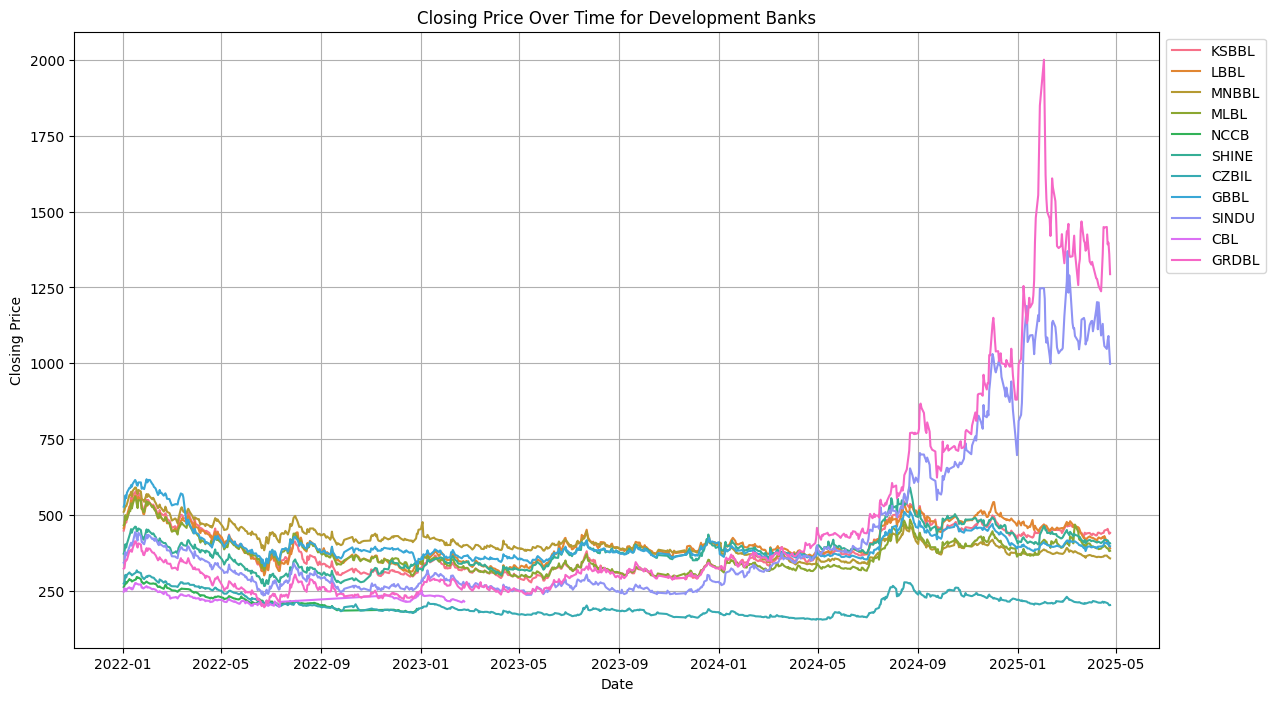

In [77]:
development_banks = [
    'LBBL', 'MLBL', 'MNBBL', 'NCCB', 'SINDU', 'SHINE', 'KSBBL', 'GBBL', 'CZBIL', 'CBL', 'GRDBL'
]

df_dev_banks = df[df['Company'].isin(development_banks)].copy()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_dev_banks, x='published_date', y='close', hue='Company')
plt.title('Closing Price Over Time for Development Banks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

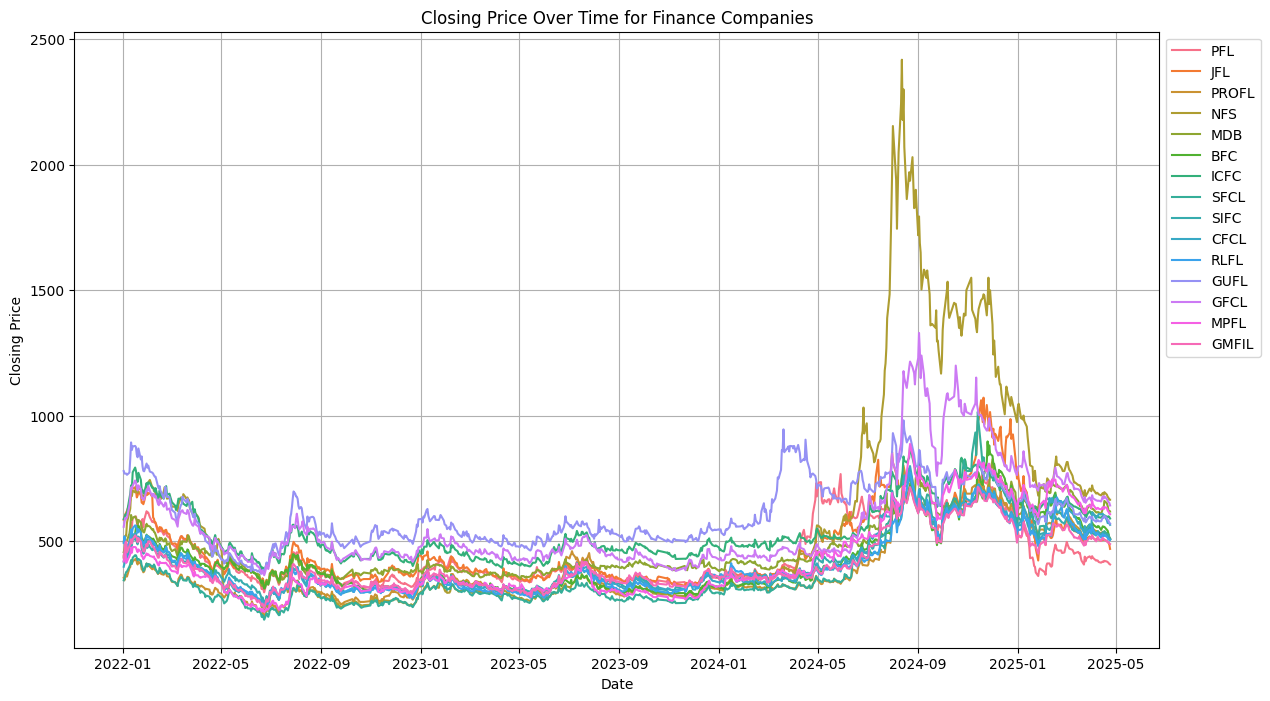

In [76]:
finance_companies = [
    'BFC', 'CFCL', 'GMFIL', 'GUFL', 'ICFC', 'JFL', 'MPFL', 'PFL',
    'PROFL', 'RLFL', 'SFCL', 'SIFC', 'MDB', 'NFS', 'GFCL'
]

df_finance = df[df['Company'].isin(finance_companies)].copy()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_finance, x='published_date', y='close', hue='Company')
plt.title('Closing Price Over Time for Finance Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

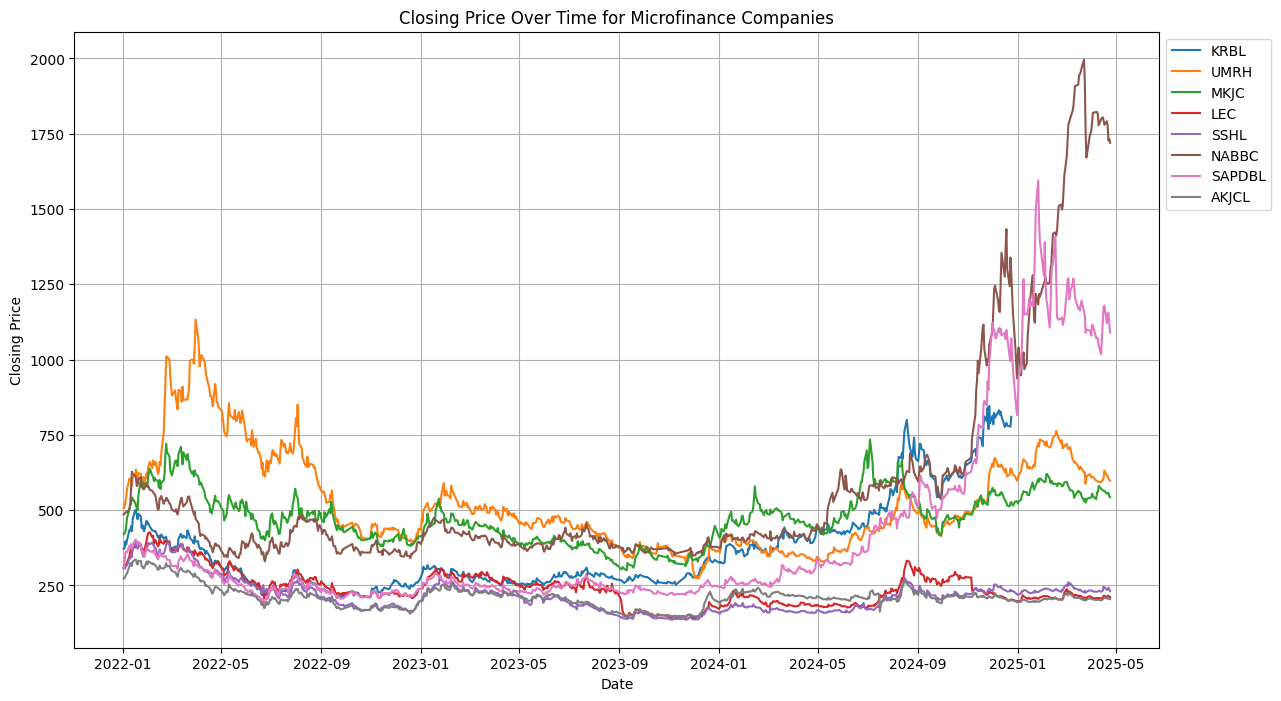

In [81]:
microfinance = [
    'AKJCL', 'KRBL', 'LEC', 'MKJC', 'NABBC', 'SAPDBL', 'SSHL', 'UMRH'
]

df_microfinance = df[df['Company'].isin(microfinance)].copy()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_microfinance, x='published_date', y='close', hue='Company')
plt.title('Closing Price Over Time for Microfinance Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

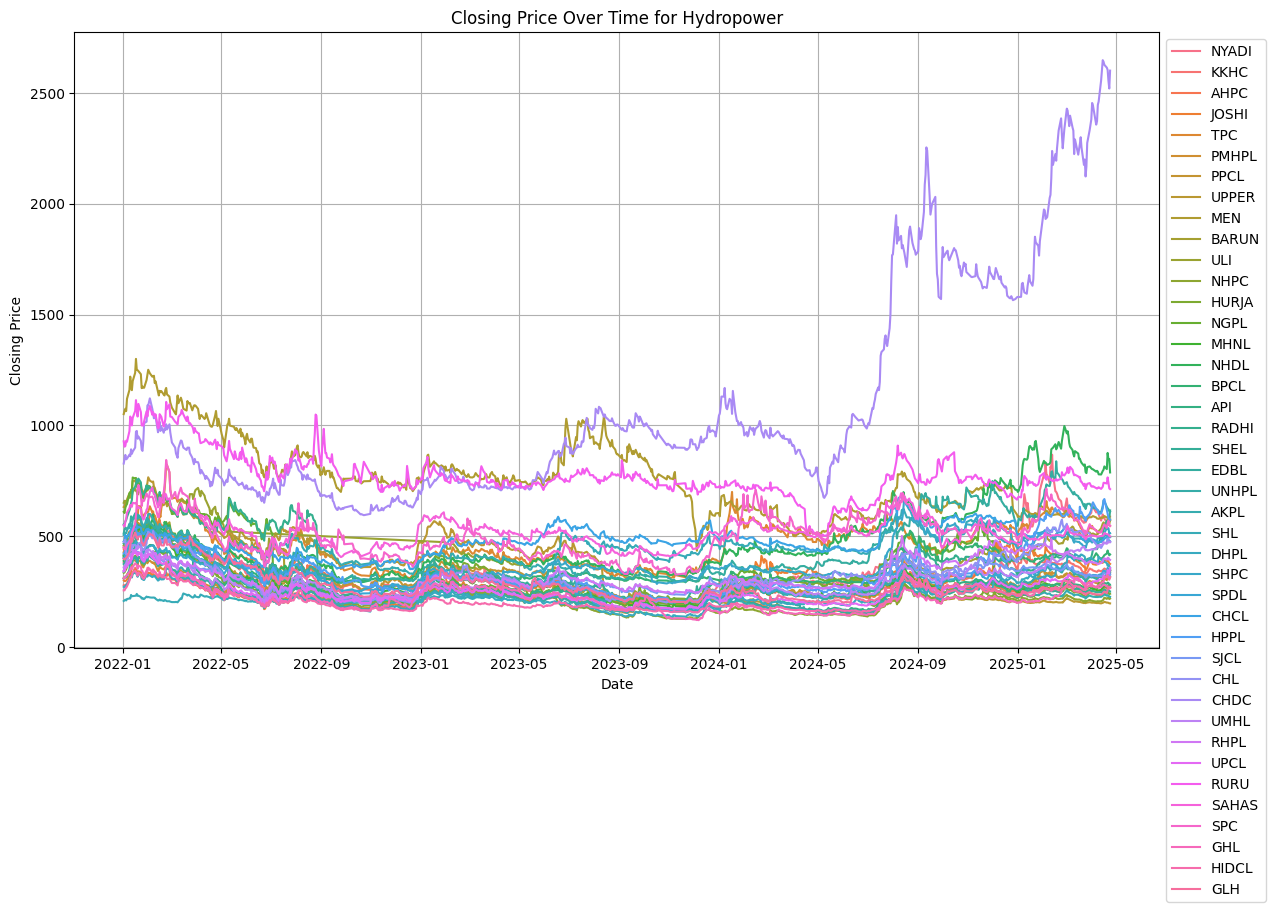

In [82]:
hydropower = [
    'AHPC', 'AKPL', 'API', 'BARUN', 'BPCL', 'CHCL', 'CHDC', 'CHL', 'DHPL', 'EDBL',
    'GHL', 'HIDCL', 'HPPL', 'HURJA', 'JOSHI', 'KKHC', 'MEN', 'MHNL', 'NHDL', 'NHPC',
    'NGPL', 'NYADI', 'PMHPL', 'PPCL', 'RADHI', 'RHPL', 'RURU', 'SAHAS', 'SHEL', 'SHL',
    'SHPC', 'SJCL', 'SPC', 'SPDL', 'TPC', 'ULI', 'UMHL', 'UNHPL', 'UPCL', 'UPPER', 'GLH'
]
df_hydropower = df[df['Company'].isin(hydropower)].copy()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_hydropower, x='published_date', y='close', hue='Company')
plt.title('Closing Price Over Time for Hydropower')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

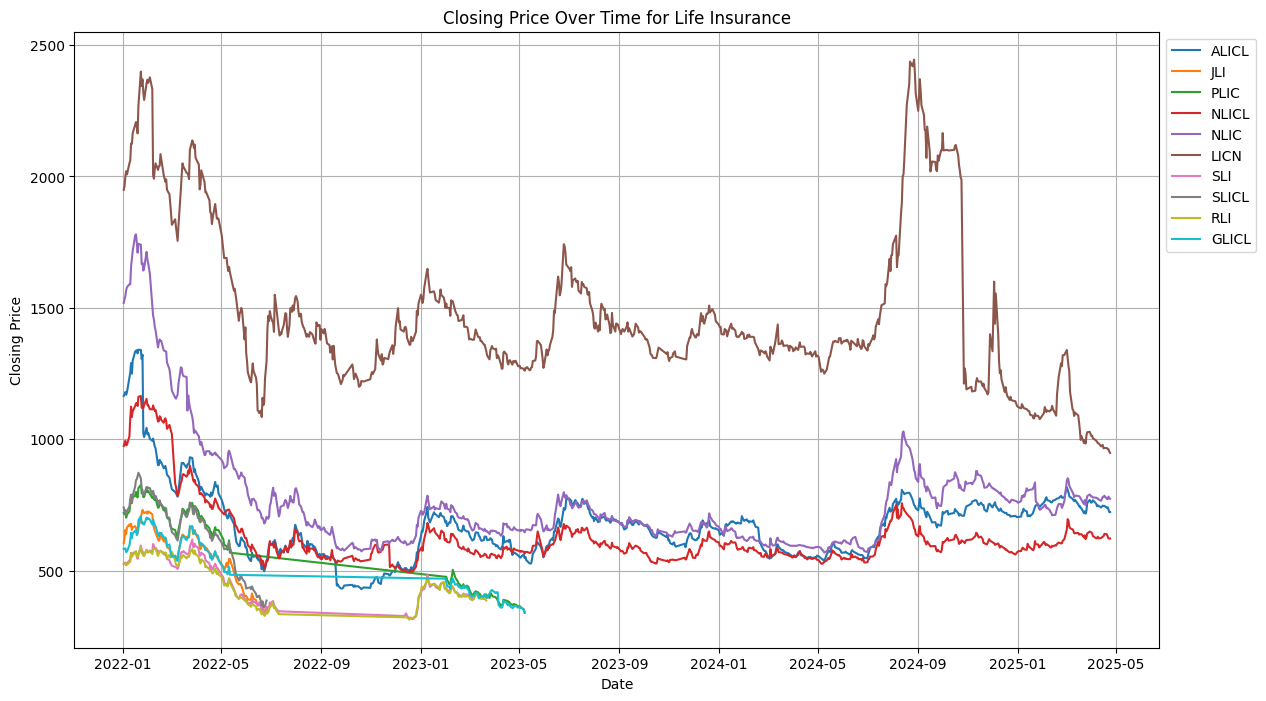

In [84]:
life_insurance = [
    'ALICL', 'GLICL', 'JLI', 'LICN', 'NLIC', 'NLICL', 'PLIC', 'RLI', 'SLICL', 'SLI'
]
df_life_insurance = df[df['Company'].isin(life_insurance)].copy()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_life_insurance, x='published_date', y='close', hue='Company')
plt.title('Closing Price Over Time for Life Insurance')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

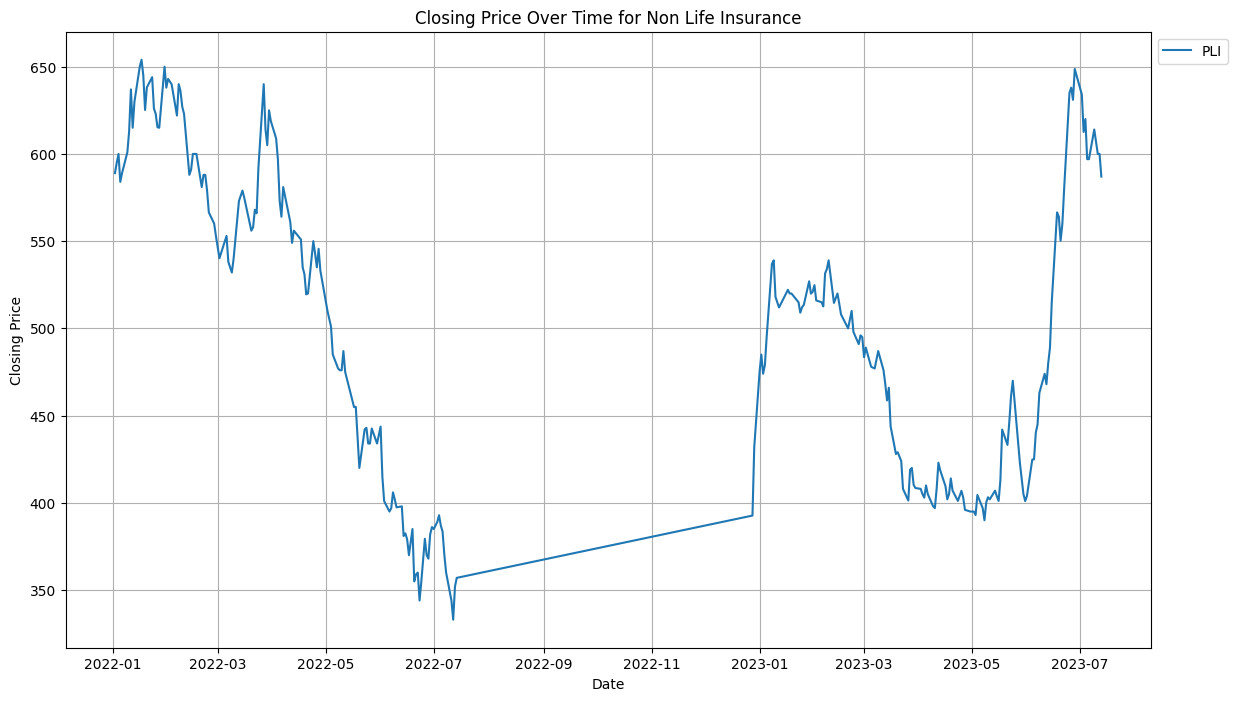

In [85]:
non_life_insurance = ['PLI']
df_non_life_insurance = df[df['Company'].isin(non_life_insurance)].copy()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_non_life_insurance, x='published_date', y='close', hue='Company')
plt.title('Closing Price Over Time for Non Life Insurance')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

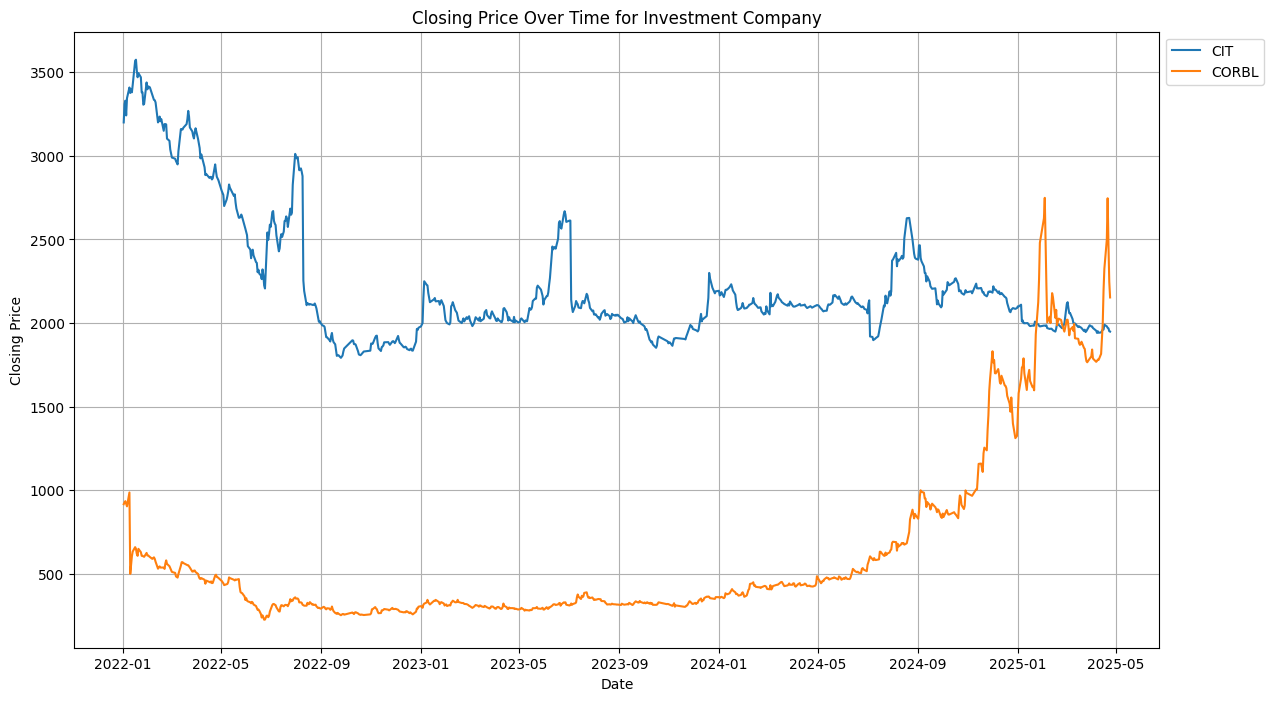

In [86]:
investment = ['CIT', 'CORBL']

df_investment = df[df['Company'].isin(investment)].copy()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_investment, x='published_date', y='close', hue='Company')
plt.title('Closing Price Over Time for Investment Company')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

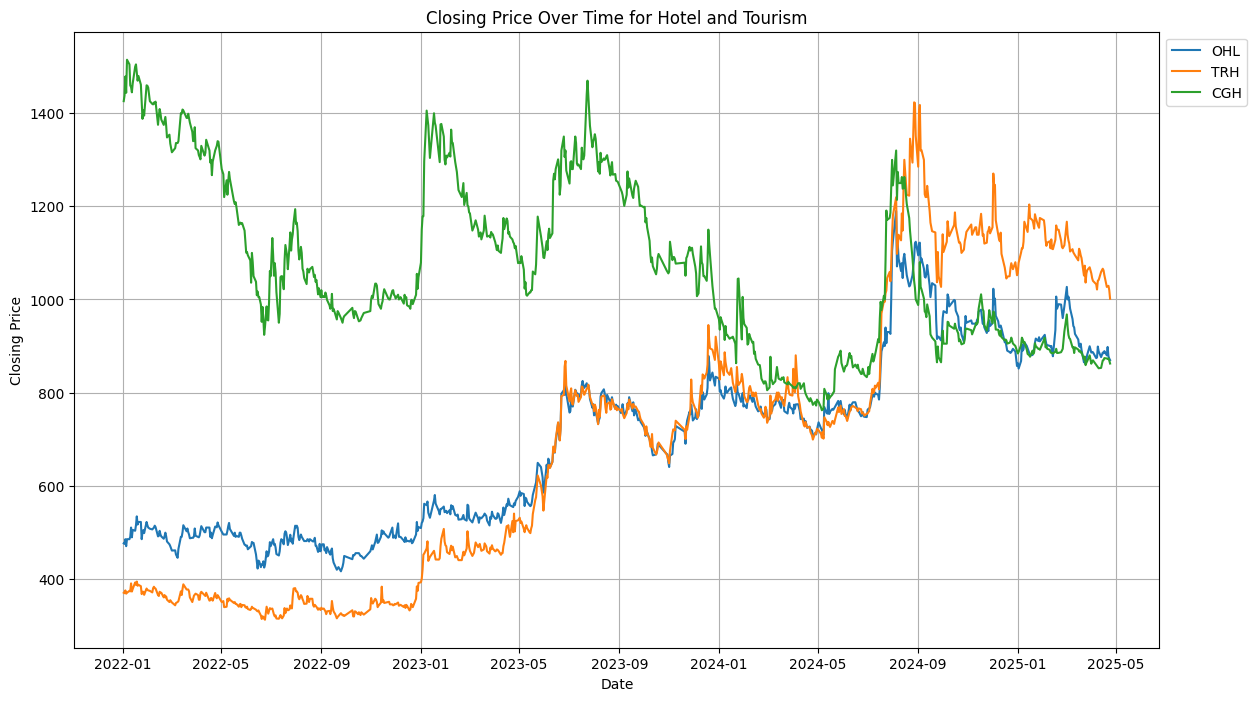

In [87]:
hotels_and_tourism = [
    'TRH', 'OHL', 'CGH'
]

df_hotels_and_tourism = df[df['Company'].isin(hotels_and_tourism)].copy()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_hotels_and_tourism, x='published_date', y='close', hue='Company')
plt.title('Closing Price Over Time for Hotel and Tourism')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# EDA of Stock Dataset

# How has the closing price changed over time for a specific company (e.g., ADBL or UPPER)?

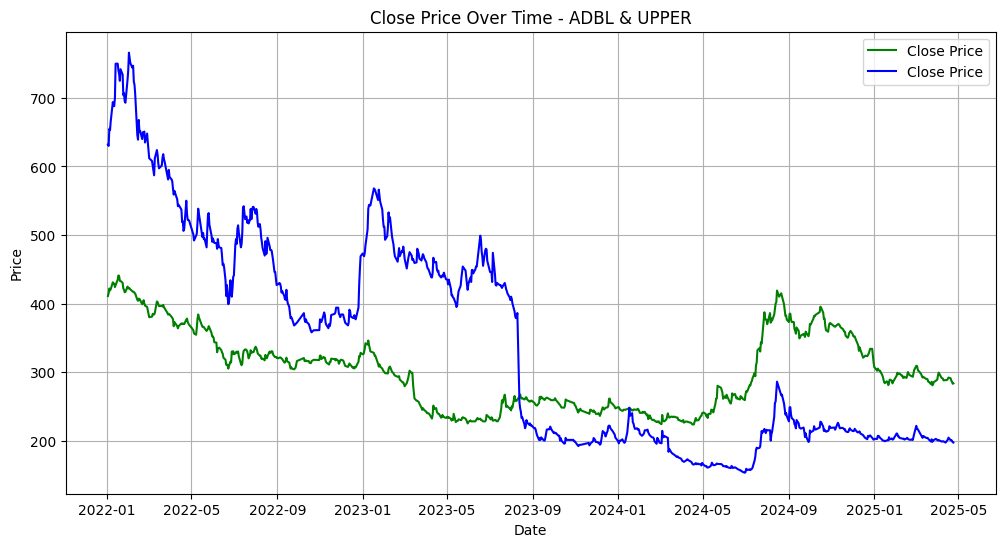

In [69]:
abdl_df = df[df['Company'] == 'ADBL'].copy()
abdl_df = abdl_df.sort_values(by='published_date')
upper_dff = df[df['Company'] == 'UPPER']
upper_dff = upper_dff.sort_values(by='published_date')
plt.figure(figsize=(12, 6))
plt.plot(abdl_df['published_date'], abdl_df['close'], label='Close Price', color='green')
plt.plot(upper_dff['published_date'], upper_dff['close'], label='Close Price', color='blue')
plt.title('Close Price Over Time - ADBL & UPPER')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

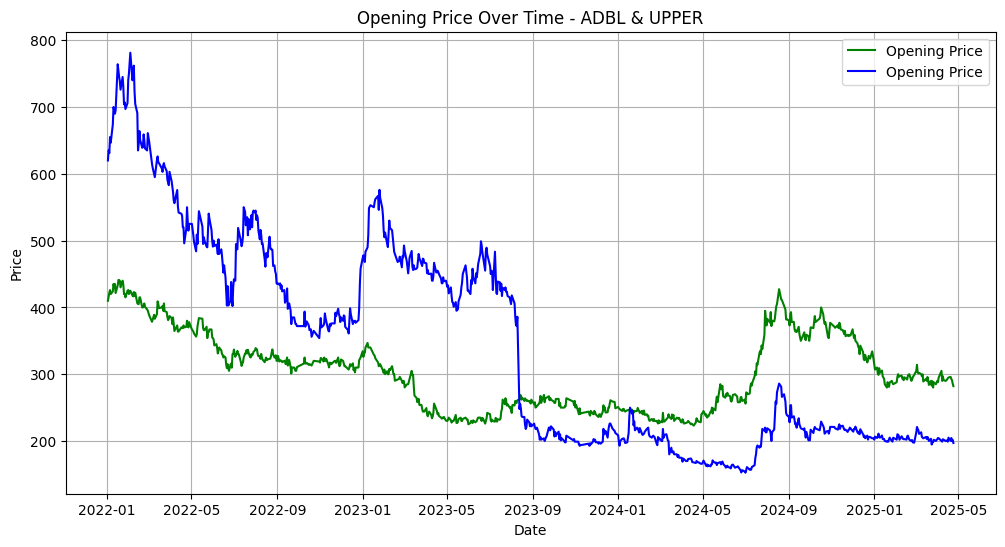

In [70]:
abdl_df = df[df['Company'] == 'ADBL'].copy()
abdl_df = abdl_df.sort_values(by='published_date')
upper_dff = df[df['Company'] == 'UPPER']
upper_dff = upper_dff.sort_values(by='published_date')
plt.figure(figsize=(12, 6))
plt.plot(abdl_df['published_date'], abdl_df['open'], label='Opening Price', color='green')
plt.plot(upper_dff['published_date'], upper_dff['open'], label='Opening Price', color='blue')
plt.title('Opening Price Over Time - ADBL & UPPER')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

# Compare the opening and closing prices over time for one company. Are there any consistent gaps?

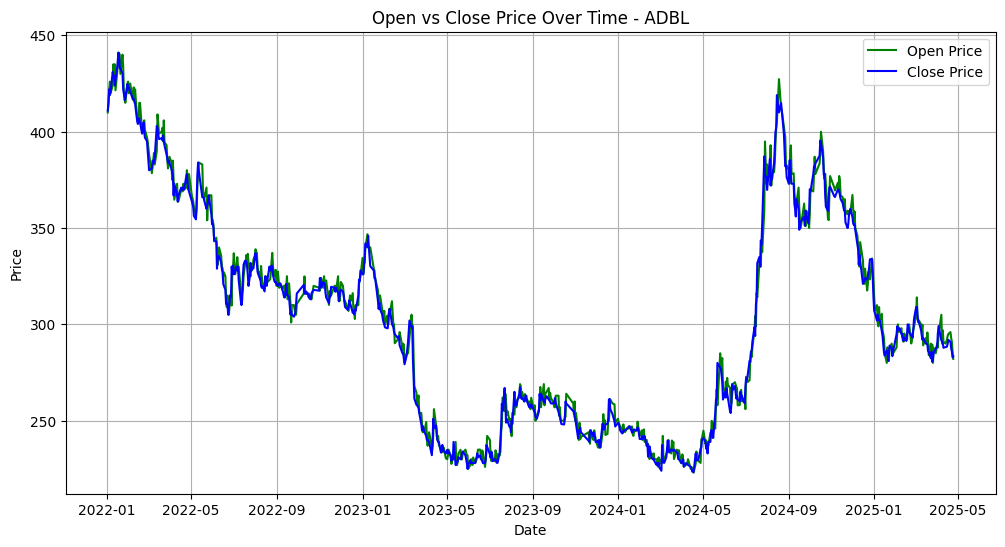

In [71]:
Company_df = df[df['Company'] == 'ADBL'].copy()
Company_df = Company_df.sort_values(by='published_date')
plt.figure(figsize=(12, 6))
plt.plot(Company_df['published_date'], Company_df['open'], label='Open Price', color='green')
plt.plot(Company_df['published_date'], Company_df['close'], label='Close Price', color='blue')
plt.title('Open vs Close Price Over Time - ADBL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

# What is the trend of per_change (percent change) over time? Are there any highly volatile periods?

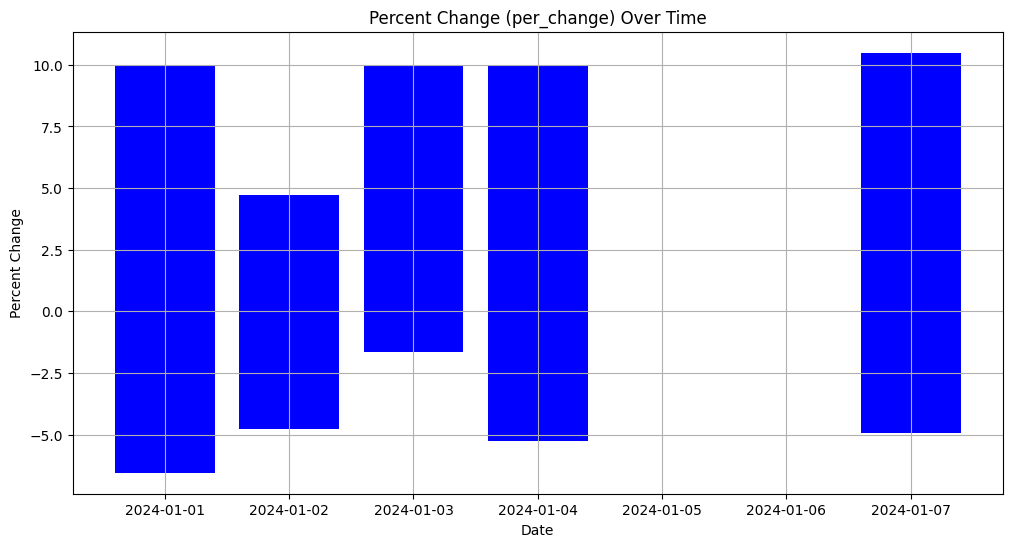

In [73]:
df= df.sort_values('published_date')
jan_df = df[(df['published_date'].dt.year == 2024) & 
            (df['published_date'].dt.month == 1) &
            (df['published_date'].dt.isocalendar().week == 1)]
plt.figure(figsize=(12, 6))
plt.bar(jan_df['published_date'], jan_df['per_change'], color='blue')
plt.title('Percent Change (per_change) Over Time')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.grid(True)
plt.show()

# Plot the traded_quantity and traded_amount over time. Are there spikes that suggest unusually high trading activity?

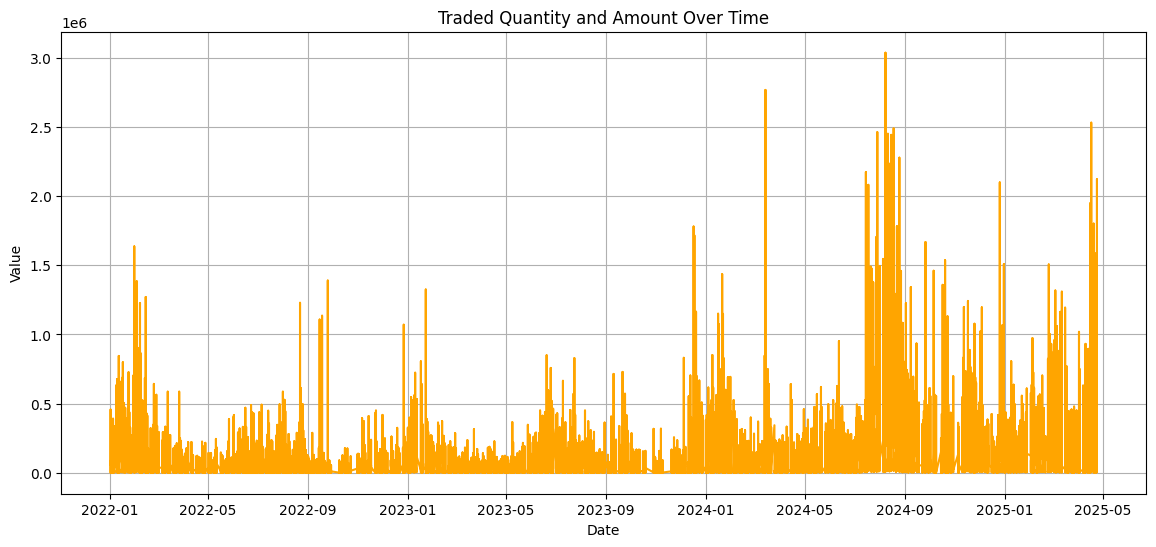

In [75]:
plt.figure(figsize=(14, 6))
plt.plot(df['published_date'], df['traded_quantity'], label='Traded Quantity', color='orange', alpha=1)
plt.title('Traded Quantity and Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

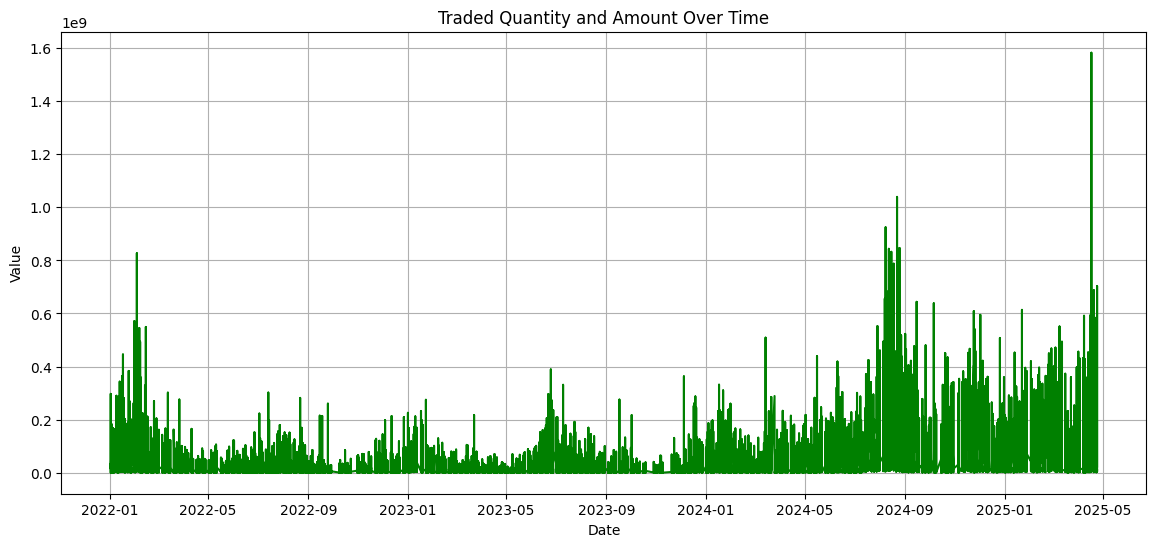

In [74]:
plt.figure(figsize=(14, 6))
plt.plot(df['published_date'], df['traded_amount'], label='Traded Amount', color='green', alpha=1)
plt.title('Traded Quantity and Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Create a multi-line plot for close prices of multiple companies. How do their trends compare over the same time period?

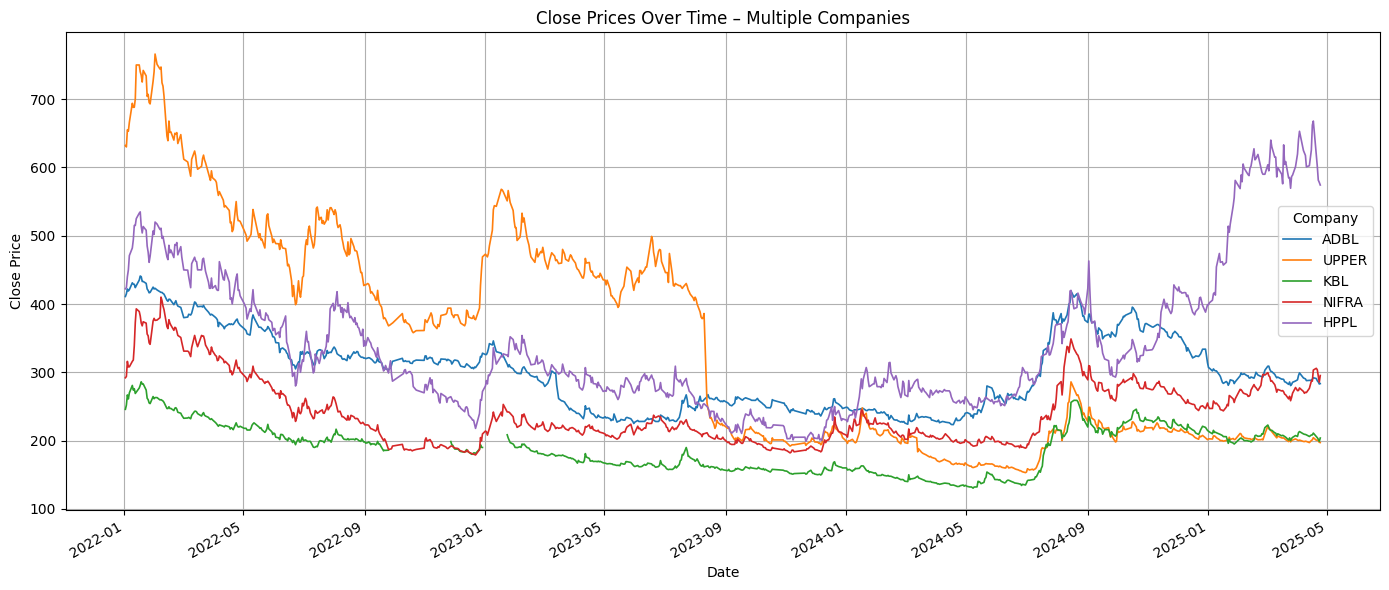

In [78]:
pivot_df = df.pivot_table(index='published_date', columns='Company', values='close')

selected_companies = ['ADBL', 'UPPER', 'KBL', 'NIFRA', 'HPPL']
pivot_df[selected_companies].plot(figsize=(14, 6), linewidth=1.2)

plt.title('Close Prices Over Time – Multiple Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend(title='Company')
plt.tight_layout()
plt.show()

# How does the closing price behave across months or years?

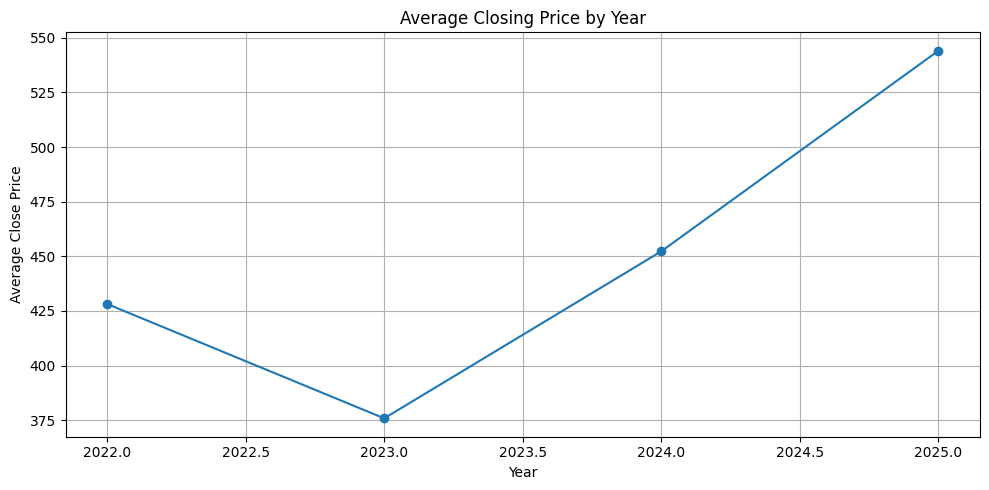

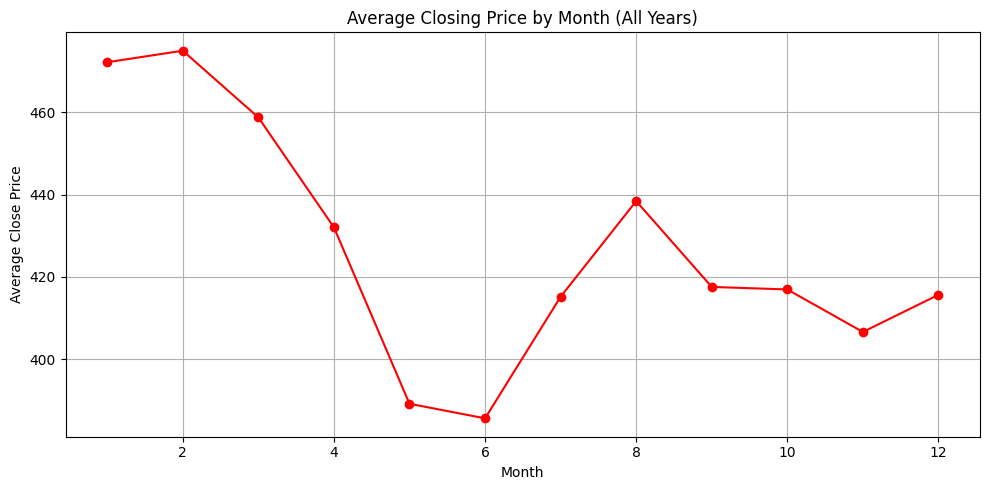

In [80]:
df['year'] = df['published_date'].dt.year

yearly_close = df.groupby('year')['close'].mean()
monthly_close = df.groupby('month')['close'].mean()

plt.figure(figsize=(10, 5))
yearly_close.plot(marker='o')
plt.title('Average Closing Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
monthly_close.plot(marker='o', color='red')
plt.title('Average Closing Price by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# General EDA

# How many unique companies are in the dataset? Which company has the most trading records?

In [ ]:
df['Company'].nunique()

121

In [ ]:
df['Company'].value_counts().head(50)

Company
ADBL     776
LBBL     776
NRN      776
KSBBL    776
NYADI    776
OHL      776
ALICL    776
UMRH     776
PCBL     776
PROFL    776
KKHC     776
AHPC     776
PFL      776
JOSHI    776
PPCL     776
JBBL     776
PMHPL    776
JFL      776
NGPL     776
MHNL     776
NHDL     776
API      776
MLBL     776
NMB      776
UPPER    776
ICFC     776
NLICL    776
BFC      776
LEC      776
PRVU     776
BPCL     776
NLIC     776
NFS      776
NHPC     776
MFIL     776
NIFRA    776
MBL      776
MDB      776
NICA     776
MEN      776
BARUN    776
LICN     776
CHCL     776
SHPC     776
SPDL     776
SHL      776
EBL      776
AKPL     776
DHPL     776
UNHPL    776
Name: count, dtype: int64

# What are the average, minimum, and maximum values for open, close, traded_amount, and per_change?

In [ ]:
df[['open','close','traded_amount','per_change']].describe().loc[['mean','min','max']]

,open,close,traded_amount,per_change
mean,430.877948,430.26261,2.264881e+07,0.148121
min,118.000000,117.10000,2.070000e+03,-10.000000
max,3608.700000,3575.00000,1.582512e+09,16.127673


# What is the distribution of daily percent change (per_change)? Are there more gain days or loss days?

In [ ]:
Gain_days = (df['per_change'] > 0).sum()
Loss_days = (df['per_change'] < 0).sum()
Neutral_days = (df['per_change'] == 0).sum()

print("Gain days:", Gain_days)
print("Loss days:",Loss_days)
print("Neutral days:",Neutral_days)

Gain days: 36914
Loss days: 43900
Neutral days: 2457


# How frequently do companies have a positive (status = 1) vs negative (status = -1) performance?

In [ ]:
df.groupby(['Company', 'status']).size().reset_index(name='count')

,Company,status,count
0,ADBL,-1,462
1,ADBL,0,29
2,ADBL,1,285
3,AHPC,-1,482
4,AHPC,0,15
...,...,...,...
357,UPCL,0,26
358,UPCL,1,280
359,UPPER,-1,486
360,UPPER,0,20


# Are there any correlations between features like open, high, low, close, and traded_amount?



In [ ]:
features = ['open', 'high', 'low', 'close', 'traded_amount']
corr_matrix = df[features].corr()
corr_matrix

,open,high,low,close,traded_amount
open,1.000000,0.999224,0.999287,0.998807,0.231062
high,0.999224,1.000000,0.998834,0.999484,0.241470
low,0.999287,0.998834,1.000000,0.999027,0.226420
close,0.998807,0.999484,0.999027,1.000000,0.236208
traded_amount,0.231062,0.241470,0.226420,0.236208,1.000000


# What are the top 5 days with the highest trading volume and how did the prices behave on those days?

In [ ]:
df.sort_values(by='traded_quantity', ascending=False).head()

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status,Company
49879,2024-08-08,285.0,311.3,280.0,307.50,8.66,3037821.0,9.246939e+08,1,NIFRA
83016,2024-03-14,180.0,190.7,170.0,187.90,2.34,2768765.0,5.089081e+08,1,UPPER
25219,2025-04-17,663.0,711.0,600.0,667.89,0.89,2531957.0,1.582512e+09,1,HPPL
29803,2024-08-18,261.1,272.9,253.0,259.00,1.17,2489844.0,6.593896e+08,-1,KBL
29790,2024-07-29,216.6,233.5,216.6,222.00,4.52,2463069.0,5.522761e+08,1,KBL


# Are there any missing values in the dataset? In which columns are they most common, and how might that affect analysis?

In [ ]:
df.isna().sum()

published_date     0
open               0
high               0
low                0
close              0
per_change         0
traded_quantity    0
traded_amount      0
status             0
Company            0
dtype: int64

There are not any missing values in the dataset.

# Which companies experienced the highest average daily percent increase/decrease over time?

In [ ]:
df.groupby('Company')['per_change'].mean().sort_values(ascending=False).head(10)

Company
NBB       0.598848
GRDBL     0.395646
CORBL     0.383733
NABBC     0.376664
NRN       0.326840
SAPDBL    0.324233
NYADI     0.303486
SINDU     0.288971
NFS       0.286693
KRBL      0.282605
Name: per_change, dtype: float64

In [ ]:
df.groupby('Company')['per_change'].mean().sort_values(ascending=False).tail(10)

Company
SRBL    -0.046099
RLI     -0.055183
LBL     -0.066658
JLI     -0.123045
GLICL   -0.127232
BOKL    -0.149393
ULI     -0.206392
PLIC    -0.307304
SLICL   -0.329394
NIB     -0.897701
Name: per_change, dtype: float64